Giovanna Nascimento Antonieti CP3013383

Daniel Brai Gonzales Marcos   CP3013375

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

!pip3 install kaggle

plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

You should consider upgrading via the 'G:\Documents\especializacao\env_analise\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
! mkdir ./.kaggle
! cp kaggle.json ./.kaggle/
! chmod 600 ./.kaggle/kaggle.json
!kaggle competitions download -c titanic

A sintaxe do comando estÃ¡ incorreta.
cp: cannot create regular file './.kaggle/': Not a directory
chmod: cannot access './.kaggle/kaggle.json': No such file or directory


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


# Descrição do problema e da base de dados

O naufrágio do Titanic é um dos mais famosos da história. Em 15 de abril de 1912, durante a viagem inaugural, o RMS Titanic - que era considerado inafundável - afundou depois de colidir com um iceberg. Infelizmente, não haviam botes salva-vidas suficientes para todas as pessoas que estavam a bordo, o que resultou na morte de 1502 pessoas dos 2224 passageiros e tripulantes. Apesar de haverem elementos de sorte envolvidos na sobrevivência de cada pessoa, há indícios de que alguns grupos de pessoas tinham maiores probabilidades de sobrevivência do que outros.

Com a análise desse conjunto de dados e a geração de um modelo de classificação preditivo, buscamos responder a pergunta: **que tipo de pessoa tem mais chance de sobreviver** ? Para tal, temos cada instância representando um dos passageiros ou tripulantes a bordo do navio, possuindo os seguintes atributos:

* **Survival** que indica se aquele passageiro sobreviveu ao naufrágio, sendo 0 = não e 1 = sim, essa é o nosso atributo alvo na classificaçao;
* **PClass** indica qual a classe da passagem, sendo 1 = primeira classe, 2 = segunda classe e 3 = terceira classe;
* **Sex** mostra a qual sexo pertence aquele passageiro;
* **Age** especifíca a idade do passageiro;
* **SibSp** indica o número de irmãos ou cônjuges a bordo do Titanic;
* **Parch** nos mostra o número de parentes do passageiro que estavam a bordo do Titanic;
* **Ticket** é o número da passagem;
* **Fare** é a tarifa de passageiro
* **Cabin** é o número da cabine;
* **Embarked** indica em qual porto aquele passageiro embarcou, sendo C = Cherbourg, Q = Queenstown e S = Southampton.


In [3]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')

In [4]:
len(titanic_data)

891

In [5]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Análise Exploratória

De acordo com a distribuição dos atributos, podemos observar que a maioria dos passageiros não sobreviveu ao naufrágio e, destes, a maior parte das instâncias de homens, pertencentes à terceira classe e haviam embarcado em Southampton. Já quando a idade, segundo o histograma, podemos observar que há uma grande concentraçao entre 20 e 40 anos.

Quanto às correlações, podemos observar que não há uma correlação forte entre nenhum dos atributos, sendo a maior entre Parch e SibSp, com 0.41, o que já era esperado uma vez que o número de irmãos e conjuges influencia no número de parentes a bordo do navio. Um outra correlação que nos chamou a atenção foi entre os atributos Fare e Survived e entre Fare e Parch, com correlações próximas, 0.26 e 0.22 (o que representa uma relação fraca).

Algumas conclusões que podemos retirar dos dados é que:
* A classe de cada passageiro influencia bastante na sobrevivência do mesmo - a maior parecla de sobreviventes encontrava-se na primeir, enquanto o maior número de mortos concetra-se na terceira classe;
* A maioria das mulheres sobreviveram, enquanto a maioria os homens não;
* Olhando para a taxa de sobrevivência de acordo com o sexo e a classe, podemos ver que a maioria das mulheres da primeira classe sobreviveram, algo próximo dos 90%, enquanto na mesma classe menos de 40% dos homens sobreviveram, esse comportamento se repete para as outras classes;
* Sobre a idade, não conseguimos tirar nenhuma conclusão do gráfico de barras empilhadas, por isso decidimos olhar a densidade de sobreviventes por idade e classe, e com isso podemos ver que os passageiros da primeira classe eram geralmente mais velhos que os passageiros da segunda classe, que por sua vez eram mais velhos do que os passageiros da terceira classe. E como indicado em outros gráficos, os passageiros da primeira classe tiveram uma taxa de sobrevivência mais alta do que os passageiros da segunda classe, que por sua vez tiveram uma taxa de sobrevivência mais alta do que os passageiros da terceira classe.

Text(0.5, 1.0, 'Age Histogram')

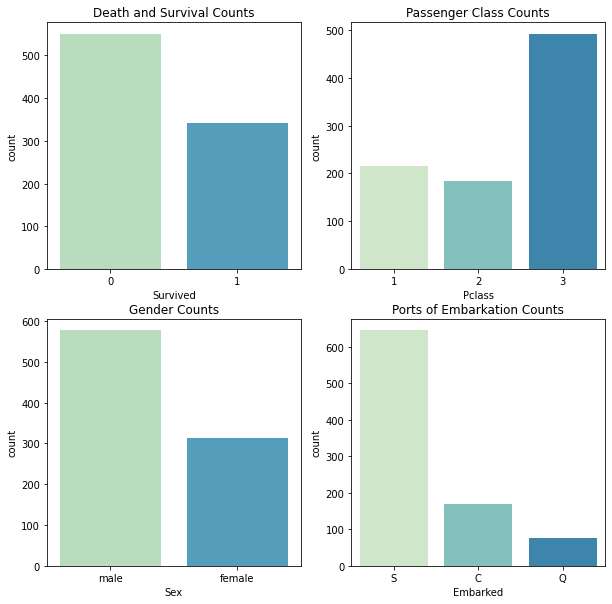

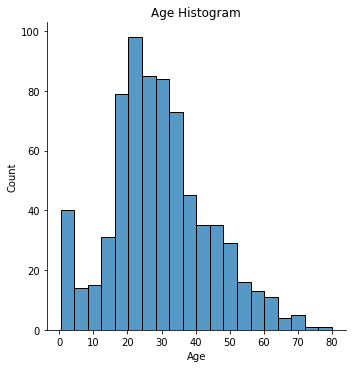

In [9]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (2, 2)
plt.subplot2grid(fig_dims, (0, 0))
sns.countplot(x='Survived',data=titanic_data, palette='GnBu')
plt.title('Death and Survival Counts')

plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x='Pclass',data=titanic_data, palette='GnBu')
plt.title('Passenger Class Counts')


plt.subplot2grid(fig_dims, (1, 0))
sns.countplot(x='Sex',data=titanic_data, palette='GnBu')
plt.title('Gender Counts')
plt.xticks(rotation=0)


plt.subplot2grid(fig_dims, (1, 1))
sns.countplot(x='Embarked',data=titanic_data, palette='GnBu')
plt.title('Ports of Embarkation Counts')


sns.displot(x='Age',data=titanic_data, palette='GnBu')
plt.title('Age Histogram')

g:\documents\especializacao\env_analise\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

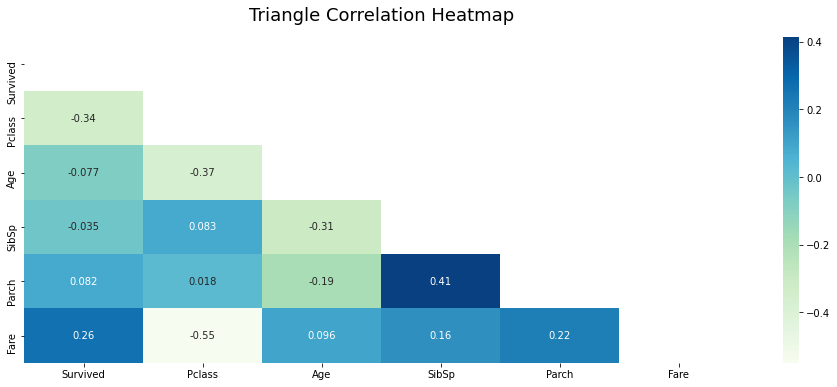

In [10]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(titanic_data.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(titanic_data.corr(), annot=True,cmap='GnBu',mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [11]:
pclass_xt = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

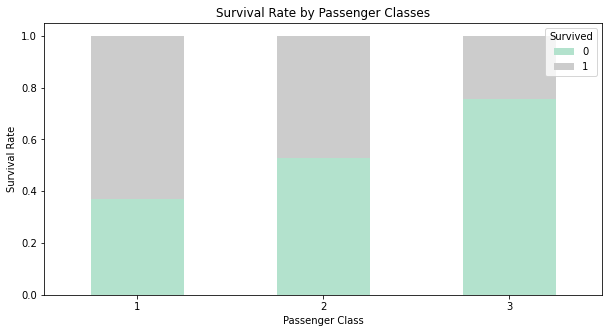

In [12]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes', colormap='Pastel2')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

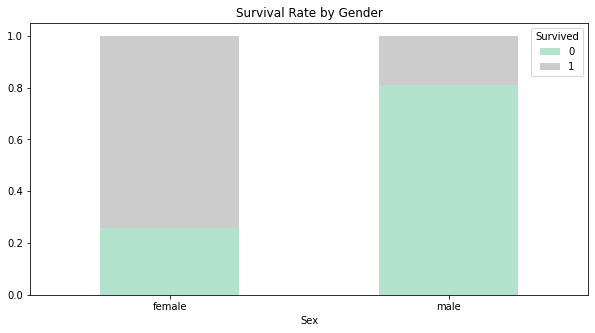

In [13]:
sex_val_xt = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender', colormap='Pastel2')
plt.xticks(rotation=0)

Text(0, 0.5, 'Survival Rate')

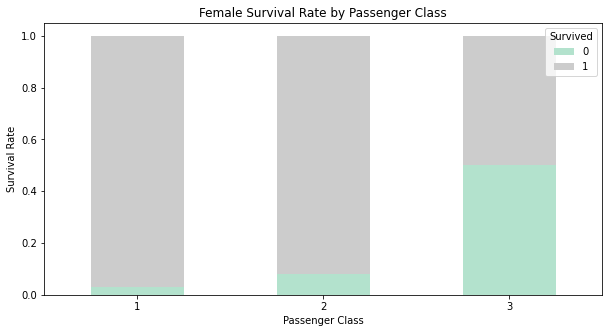

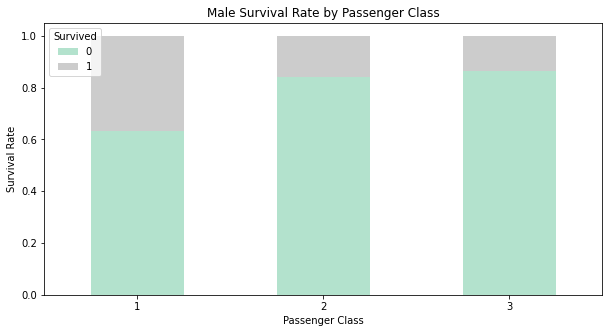

In [14]:
females_df = titanic_data[titanic_data['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], titanic_data['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class', colormap='Pastel2')
plt.xticks(rotation=0)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = titanic_data[titanic_data['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], titanic_data['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class', colormap='Pastel2')
plt.xticks(rotation=0)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

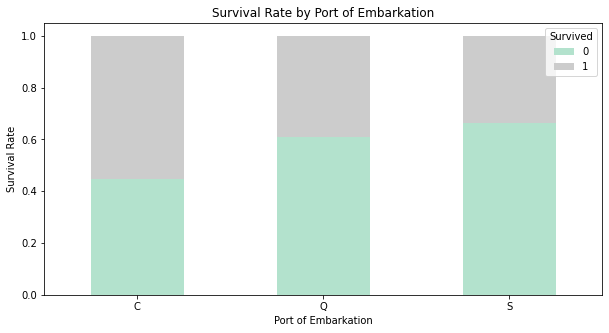

In [15]:
embarked_val_xt = pd.crosstab(titanic_data['Embarked'], titanic_data['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.xticks(rotation=0)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Age')

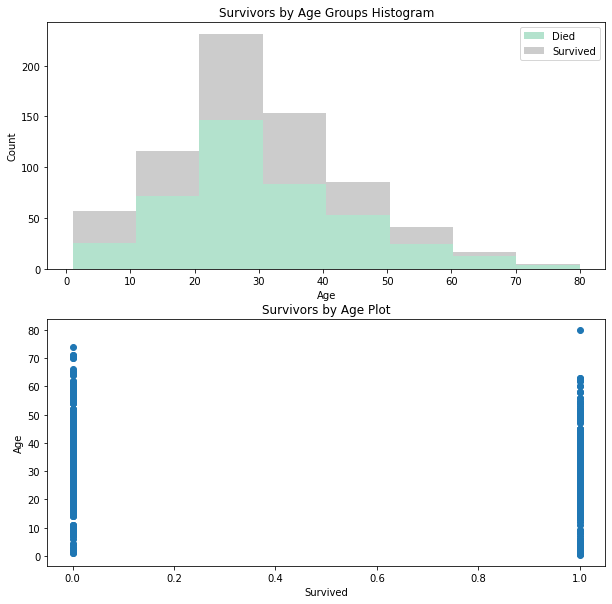

In [16]:
import matplotlib as mt
cmap = mt.cm.get_cmap('Pastel2')

rgba_0 = cmap(0)
rgba_1 = cmap(7)
titanic_data['AgeFill'] = titanic_data['Age']

# Populate AgeFill
titanic_data['AgeFill'] = titanic_data['AgeFill'] \
                        .groupby([titanic_data['Sex'], titanic_data['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = titanic_data[titanic_data['Survived'] == 0]['Age']
df2 = titanic_data[titanic_data['Survived'] == 1]['Age']
max_age = max(titanic_data['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True, color=[rgba_0, rgba_1])
plt.xticks(rotation=0)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(titanic_data['Survived'], titanic_data['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')


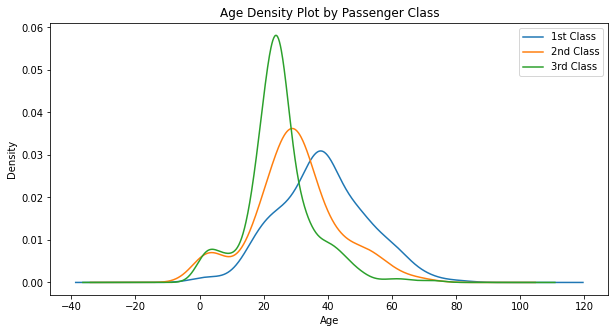

In [17]:
passenger_classes = sorted(titanic_data['Pclass'].unique())
for pclass in passenger_classes:
    titanic_data.AgeFill[titanic_data.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [18]:
titanic_data.drop(columns=['AgeFill'], inplace=True)

# Limpeza e preparação da base de dados

Como a maior parte dos registros não continham a informação do atributo cabine, optamos por sua exclusão; em relação às idades faltantes, decidimos preencher com a mediana, enquanto que as informações sobre embarque serão preenchidas com o porto mais frequente, uma vez que é um dado categórico.

Optamos também por remover as duplicidades presentes nos dados. Realizamos o *feature scaling* nos dados para evitar que os valores possuam grandes intervalos entre o maior e menor valor.

O pipeline de pré-processamento foi pensado para tratar os dados categóricos, numéricos e realizar o *feature engineering*, onde criamos uma variável que agrupa dois atributos, o número de parentes e números de irmãos/conjuges a bordo, o que pode facilitar a criação dos modelos.

## Remoção Nulos e duplicados

In [19]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
titanic_data.drop(columns=["Cabin"], inplace=True)

In [21]:
titanic_data[titanic_data.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


In [22]:
titanic_data.drop_duplicates(inplace=True)
titanic_data.duplicated().any()

False

## Separação dos dados

In [23]:
y_train = titanic_data['Survived'].values
X_train = titanic_data.drop(columns=['Survived'])

## Pipeline

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatEngineering(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, df):
        df['FamilySize'] = df['SibSp'] + df['Parch']
        
        return df

class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, verbose=False):
        self.verbose = verbose
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        X_out = X.drop(columns=['SibSp', 'Parch'])
        
        return X_out

In [25]:
numeric_features = ['Age','Fare']
categorical_features = ['Embarked', 'Sex','Pclass' ]
all_features =[  'SibSp', 'Parch']
pipeline_categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OneHotEconder', preprocessing.OneHotEncoder(handle_unknown='ignore'))])

pipeline_numeric =  Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("scaler", preprocessing.StandardScaler())])

pipeline =  Pipeline([
    ('featureEngineering', FeatEngineering()),
    ('drop', DropFeatures())])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_numeric, numeric_features),
        ("cat", pipeline_categorical, categorical_features),
        ("features", pipeline, all_features)
    ]
)


In [26]:
pipeline_svm = Pipeline([('preprocessing', preprocessor), ('svm', SVC())])
pipeline_knn = Pipeline([('preprocessing', preprocessor), ('knn', KNeighborsClassifier())])
pipeline_random = Pipeline([('preprocessing', preprocessor), ('randomforest', RandomForestClassifier())])
preprocessor.fit_transform(X_train)

array([[-0.56573646, -0.50244517,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  0.        ,
         1.        ,  3.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

#Treinamento e Validação de modelos de regressão

Decidimos comparar três modelos/algoritmos diferentes, sendo eles:
* KNN - melhores parâmetros: {'knn__algorithm': 'auto','knn__n_neighbors': 7} e melhor *score*: 0.7946317103620474;
* SVM - melhores parâmetros: {'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'linear'} e melhor *score*: 0.8282646691635456;
* Random Forest - melhores parâmetros:{'randomforest__criterion': 'entropy', 'randomforest__n_estimators': 100} e melhor *score*: 0.8103245942571785;

Em todos os modelos utilizamos o **GridSearch** para otimizar os hiperparâmetros e também utilizamos **Cross-validation**. Optamos por utilizar a acurácia como métrica de avaliação nesse caso, e de acordo com o score do melhor modelo podemos observar que não é um número muito alto, o que não nos chama atenção para um *overfitting* e nem muito baixo que indique um *underfitting*.

Exatamente por esse motivo escolhemos os melhores modelos de cada algoritmo para aplicar nos dados de teste, onde obtivemos os seguintes *scores*:
* KNN - 0.75837;
* SVM - 0.79904;
* RandomForest - 0.78229;

O que nos mostra que o que foi observado no treinamento se repetiu nos dados de teste, mantendo o SVM com o melhor desempenho nesse conjunto de dados. Outra coisa que esses resultados nos mostram é que os modelos não possuem *overfitting*, mantendo um desempenho próximo do treinamento, algo próximo de 0.03 de diferença.


## Treinamento

### KNN

In [27]:
pipeline_knn.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Age', 'Fare']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('OneHotEconder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Embarked', 'Sex', 'Pclass']),
                                   ('features',
                                    Pipeline(steps=[('featureEngineering',
                                                     FeatEngin

In [28]:
params_knn=[{'knn__n_neighbors':[3,5,7], 'knn__algorithm':['auto','ball_tree', 'kd_tree', 'brute']}]

gs_knn = GridSearchCV(pipeline_knn, params_knn, cv=10, scoring='accuracy')
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                            

In [29]:
print(gs_knn.best_params_)
bestknn_model = gs_knn.best_estimator_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 5}


In [30]:
gs_knn.best_score_

0.8081273408239701

### SVM

In [31]:
pipeline_svm.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Age', 'Fare']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('OneHotEconder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Embarked', 'Sex', 'Pclass']),
                                   ('features',
                                    Pipeline(steps=[('featureEngineering',
                                                     FeatEngin

In [32]:
params_svm=[{'svm__kernel':['linear','poly', 'rbf', 'sigmoid'], 'svm__gamma':['auto','scale'], 'svm__degree':[3,4,5]}]

gs_svm = GridSearchCV(pipeline_svm, params_svm, cv=10, scoring='accuracy')
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                            

In [33]:
print(gs_svm.best_params_)
bestsvm_model = gs_svm.best_estimator_

{'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


In [34]:
gs_svm.best_score_

0.8271785268414481

### Random Forest

In [35]:
pipeline_random.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Age', 'Fare']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('OneHotEconder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Embarked', 'Sex', 'Pclass']),
                                   ('features',
                                    Pipeline(steps=[('featureEngineering',
                                                     FeatEngin

In [36]:
params_random=[{'randomforest__n_estimators':[10,50,100,150,200], 'randomforest__criterion':['gini','entropy']}]

gs_random = GridSearchCV(pipeline_random, params_random, cv=10, scoring='accuracy')
gs_random.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                            

In [37]:
print(gs_random.best_params_)
bestrandom_model = gs_random.best_estimator_

{'randomforest__criterion': 'entropy', 'randomforest__n_estimators': 50}


In [38]:
gs_random.best_score_

0.8104244694132335

## Validação

In [39]:
X_test = pd.read_csv('test.csv', index_col='PassengerId')
X_test.drop(columns=["Cabin"], inplace=True)

In [40]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


### KNN

In [41]:
y_test_knn = bestknn_model.predict(X_test)

In [42]:
y_test_knn

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [43]:
csv_knn = []
for i in range(len(X_test.index)):
    passenger = [ i, y_test_knn[i]]
    csv_knn.append(passenger)

In [44]:
knn_result = pd.DataFrame(csv_knn, columns=['PassengerId', 'Survived'])
knn_result = knn_result.set_index('PassengerId')

In [45]:
knn_result.to_csv('knn_result.csv')

In [46]:
!kaggle competitions submit -c titanic -f knn_result.csv -m "Knn Model"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/2.77k [00:00<?, ?B/s]
100%|##########| 2.77k/2.77k [00:02<00:00, 1.36kB/s]


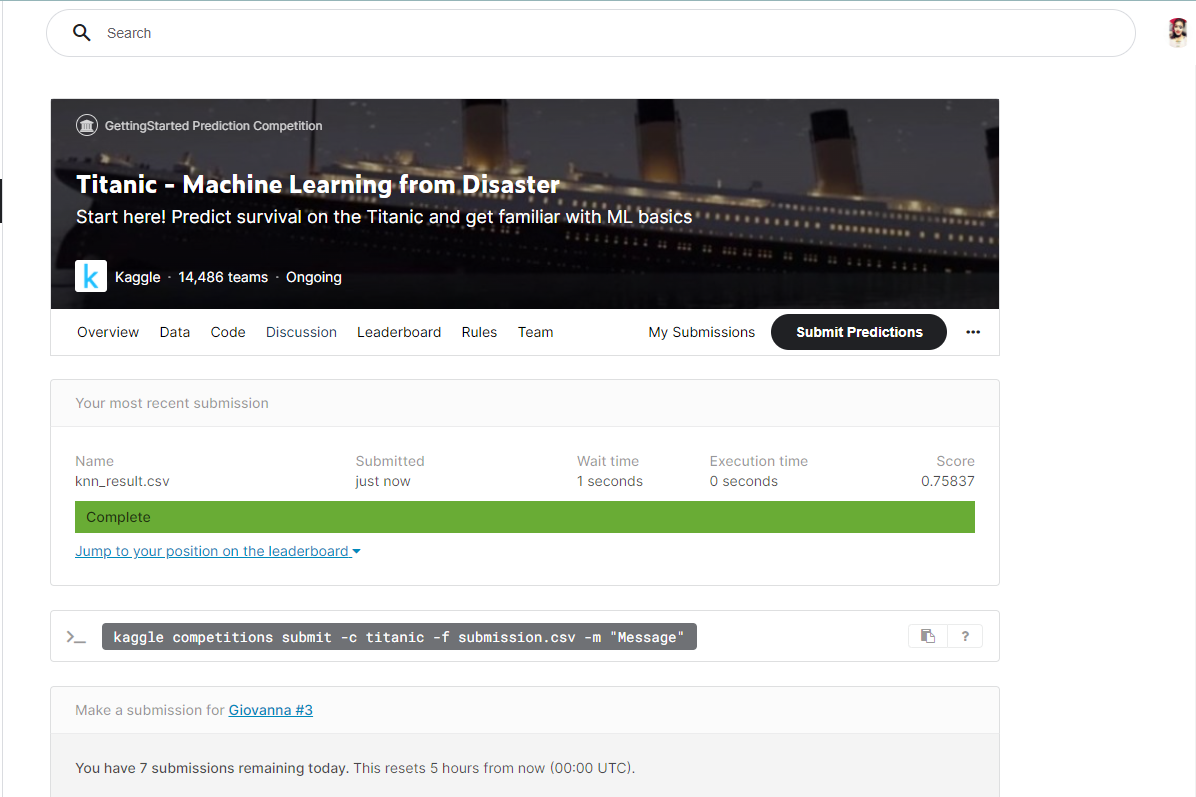

### SVM

In [47]:
y_test_svm = bestsvm_model.predict(X_test)

In [49]:
csv_svm = []
for i in range(len(X_test.index)):
    passenger = [i, y_test_svm[i]]
    csv_svm.append(passenger)

In [50]:
svm_result = pd.DataFrame(csv_svm, columns=['PassengerId', 'Survived'])
svm_result = svm_result.set_index('PassengerId')

In [51]:
svm_result.to_csv('svm_result.csv')

In [52]:
!kaggle competitions submit -c titanic -f svm_result.csv -m "svm Model"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/2.77k [00:00<?, ?B/s]
100%|##########| 2.77k/2.77k [00:00<00:00, 23.6kB/s]
100%|##########| 2.77k/2.77k [00:02<00:00, 1.36kB/s]


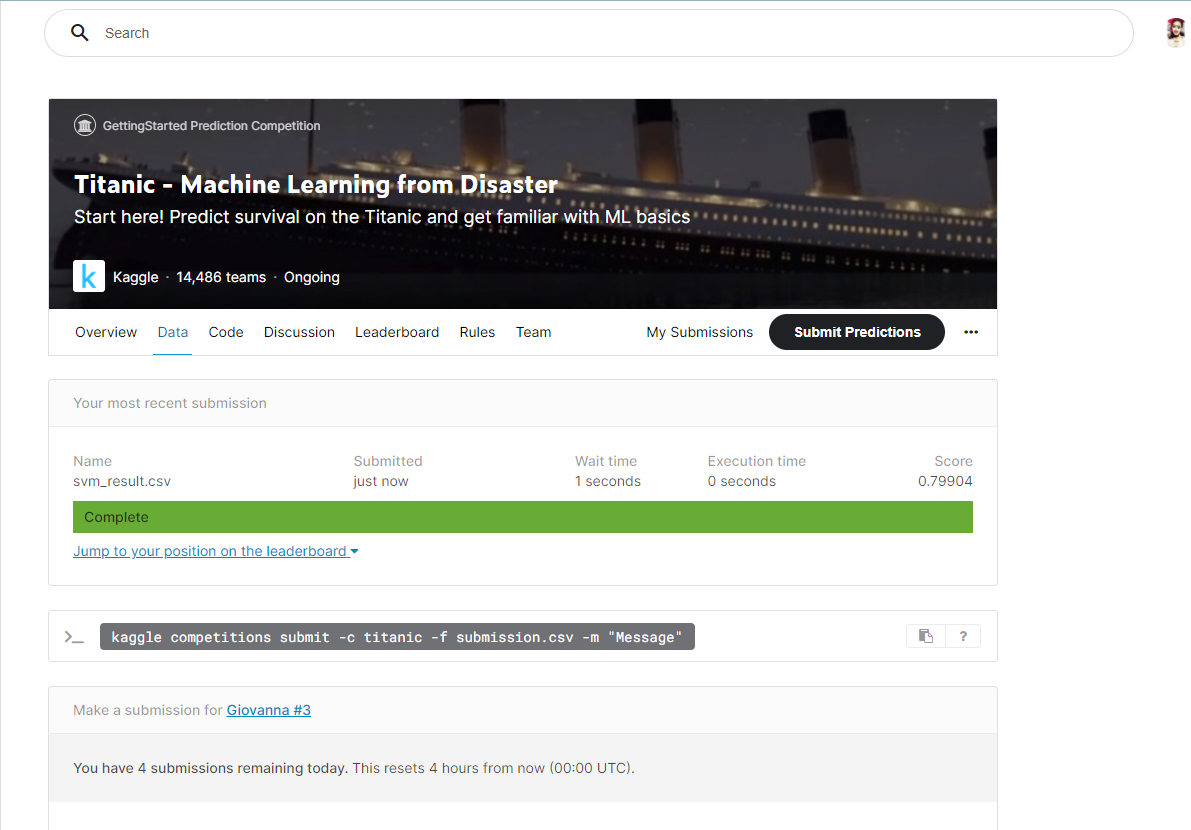

### Random Forest

In [53]:
y_test_random = bestrandom_model.predict(X_test)

In [54]:
csv_random = []
for i in range(len(X_test.index)):
    passenger = [ i, y_test_random[i]]
    csv_random.append(passenger)

In [55]:
random_result = pd.DataFrame(csv_random, columns=['PassengerId', 'Survived'])
random_result = random_result.set_index('PassengerId')

In [56]:
random_result.to_csv('random_result.csv')

In [57]:
!kaggle competitions submit -c titanic -f random_result.csv -m "Random Model"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/2.77k [00:00<?, ?B/s]
100%|##########| 2.77k/2.77k [00:02<00:00, 1.36kB/s]


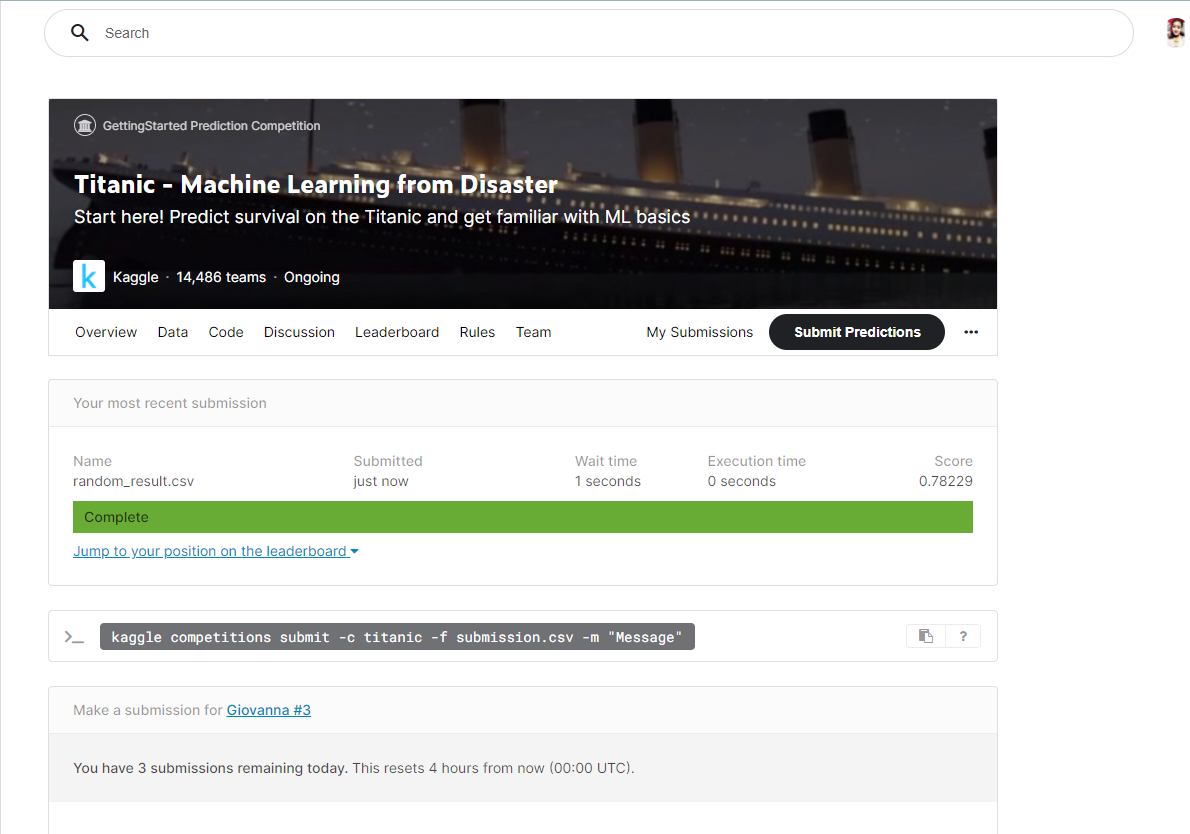

# Trabalhos futuros:

Seria interessante testar alguns outros modelos nesse conjunto de dados, como por exemplo o NaiveBayes que pode ter um bom desempenho nesse cenário. Além disso fazer o GridSearch com mais hiperparâmetros para testar mais modelos, para achar um que possui melhor desempenho, também é um caminho que pode ser seguido.